<div style="position:relative;">
<img src=images/pandas_badge2.jpg style="width: 60px; float: left" />
</div>
<div style="position:relative;">
<img src=images/pandas_badge2.jpg style="width: 60px; float: right" />
</div>

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Pandas


**pandas** provides high-performance easy-to-use data structures and data-analysis tools.


The API is heavily influenced by the programming language **R**.

The *pandas* package is the most important tool at the disposal of Data Scientists and Analysts working in Python today. The powerful machine learning and glamorous visualization tools may get all the attention, but pandas is the backbone of most data projects. 

>\[*pandas*\] is derived from the term "**pan**el **da**ta", an econometrics term for data sets that include observations over multiple time periods for the same individuals. — [Wikipedia](https://en.wikipedia.org/wiki/Pandas_%28software%29)

## What's Pandas for?

Pandas has so many uses that it might make sense to list the things it can't do instead of what it can do. 

This tool is essentially your data’s home. Through pandas, you get acquainted with your data by cleaning, transforming, and analyzing it. 

For example, say you want to explore a dataset stored in a CSV on your computer. Pandas will extract the data from that CSV into a DataFrame — a table, basically — then let you do things like:

- Calculate statistics and answer questions about the data, like


    - What's the average, median, max, or min of each column? 
    - Does column A correlate with column B?
    - What does the distribution of data in column C look like?


- Clean the data by doing things like removing missing values and filtering rows or columns by some criteria


- Visualize the data with help from Matplotlib. Plot bars, lines, histograms, bubbles, and more. 


- Store the cleaned, transformed data back into a CSV, other file or database


Before you jump into the modeling or the complex visualizations you need to have a good understanding of the nature of your dataset and pandas is the best avenue through which to do that.



In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt

## Series and DataFrames

The basic building blocks in **pandas** are
  * `pd.Series` a one-dimensional labeled array capable of holding any data type
  * `pd.DataFrame` a two-dimensional labeled array with columns of potentially different data types.

In [ ]:
series = pd.Series([3, 1, 4, 1, 5, 9, 2, 6], name='DigitsOfPi')
series

In [8]:
df = pd.DataFrame({'PrimeNumbers': [2, 3, 5, 7, 11, 13, 17, 19],
                   'FibonacciNumbers': [0, 1, 1, 2, 3, 5, 8, 13],
                   'Alphabet': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']})
df.head(-1)

,PrimeNumbers,FibonacciNumbers,Alphabet
0,2,0,a
1,3,1,b
2,5,1,c
3,7,2,d
4,11,3,e
5,13,5,f
6,17,8,g


## Data Indexing & Selection

Very powerful!

There are endless possibilities to index and select data.
Even hierarchical indexes are possible.

You can select along two axes:
  * The index (usually a range of numbers, strings or timestamps)
  * The columns (usually strings)
  
http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [9]:
df.columns

Index(['PrimeNumbers', 'FibonacciNumbers', 'Alphabet'], dtype='object')

In [10]:
df.index

RangeIndex(start=0, stop=8, step=1)

### Examples: Selecting one column

In [11]:
df['PrimeNumbers']

0     2
1     3
2     5
3     7
4    11
5    13
6    17
7    19
Name: PrimeNumbers, dtype: int64

In [12]:
df.PrimeNumbers

0     2
1     3
2     5
3     7
4    11
5    13
6    17
7    19
Name: PrimeNumbers, dtype: int64

### Examples: Selecting multiple columns

In [13]:
df[['PrimeNumbers', 'Alphabet']]

,PrimeNumbers,Alphabet
0,2,a
1,3,b
2,5,c
3,7,d
4,11,e
5,13,f
6,17,g
7,19,h


### Examples: Selecting on index

In [14]:
df.loc[1]

PrimeNumbers        3
FibonacciNumbers    1
Alphabet            b
Name: 1, dtype: object

In [15]:
df.loc[3:6]

,PrimeNumbers,FibonacciNumbers,Alphabet
3,7,2,d
4,11,3,e
5,13,5,f
6,17,8,g


### Examples: Selecting on column and index

In [16]:
df.loc[[1,4,6], ['Alphabet', 'PrimeNumbers']]

,Alphabet,PrimeNumbers
1,b,3
4,e,11
6,g,17


### Examples: Selecting using a boolean mask

In [21]:
cut = (df.PrimeNumbers < 10) & (df.PrimeNumbers > 3) | (df.Alphabet == "e")
df[cut]

,PrimeNumbers,FibonacciNumbers,Alphabet
2,5,1,c
3,7,2,d
4,11,3,e


## Relation to numpy ndarray

The Data-structures are:
  * build on top of **NumPy** `np.ndarray`s
  * behave in many aspects like `np.ndarray`s
  * column-based (column-wise operations are a lot faster than row-wise)

In [22]:
df.values

array([[2, 0, 'a'],
       [3, 1, 'b'],
       [5, 1, 'c'],
       [7, 2, 'd'],
       [11, 3, 'e'],
       [13, 5, 'f'],
       [17, 8, 'g'],
       [19, 13, 'h']], dtype=object)

In [23]:
df.PrimeNumbers + df.FibonacciNumbers

0     2
1     4
2     6
3     9
4    14
5    18
6    25
7    32
dtype: int64

## Data Manipulation

In [24]:
df['DigitsOfPi'] = series
df.head()

,PrimeNumbers,FibonacciNumbers,Alphabet,DigitsOfPi
0,2,0,a,3
1,3,1,b,1
2,5,1,c,4
3,7,2,d,1
4,11,3,e,5


In [27]:
df.loc[10] = ['j', 34, 29, 3]
df.tail()

,PrimeNumbers,FibonacciNumbers,Alphabet,DigitsOfPi
5,13,5,f,9
6,17,8,g,2
7,19,13,h,6
9,j,34,29,3
10,j,34,29,3


## Missing Data

Pandas can handle missing data and will (in contrast to numpy) mostly ignore it during caluclations.

In [28]:
df.loc[8, ['Alphabet', 'DigitsOfPi']] = ['i', 5]
df.tail()

,PrimeNumbers,FibonacciNumbers,Alphabet,DigitsOfPi
6,17,8.0,g,2.0
7,19,13.0,h,6.0
9,j,34.0,29,3.0
10,j,34.0,29,3.0
8,NaN,NaN,i,5.0


## Descriptive statistics

Pandas contains many methods to do descriptive statistics.

One of the most useful methods is `pd.DataFrame.describe`.

In [29]:
df.describe()

,FibonacciNumbers,DigitsOfPi
count,10.000000,11.000000
mean,10.100000,3.818182
std,13.186272,2.358736
min,0.000000,1.000000
25%,1.250000,2.500000
50%,4.000000,3.000000
75%,11.750000,5.000000
max,34.000000,9.000000


In [31]:
df['FibonacciNumbers'].sum()

101.0

In [32]:
df.DigitsOfPi.value_counts()

3.0    3
1.0    2
5.0    2
4.0    1
9.0    1
2.0    1
6.0    1
Name: DigitsOfPi, dtype: int64

## Visualization

Pandas defines powerful plotting mechanisms based on **matplotlib**

http://pandas.pydata.org/pandas-docs/stable/visualization.html

<AxesSubplot: >

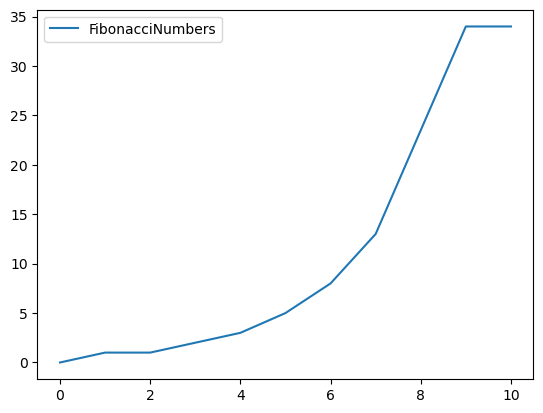

In [33]:
df[['PrimeNumbers', 'FibonacciNumbers']].plot()

<AxesSubplot: >

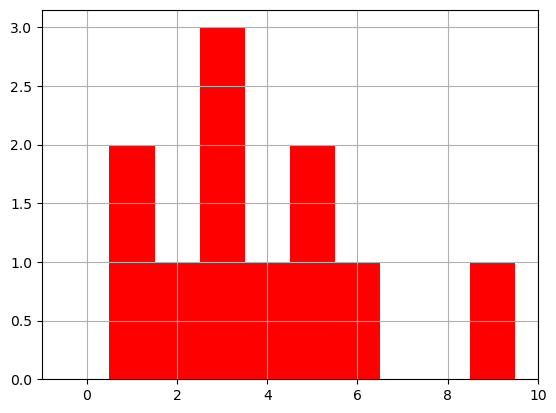

In [35]:
df['DigitsOfPi'].hist(bins=10, range=(-0.5, 9.5),color="red")

## Interfacing with Twitter!

In [36]:
!pip install tweepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 5.0 MB/s eta 0:00:00


In [37]:
import configparser
config = configparser.ConfigParser()
config.read('config.ini')
keys = config["Twitter"]

In [38]:
!cat config.ini

[Twitter]
api = K78DG4fjKy9xmwLSXLObH54XE
api_secret = Pg17CFpOZlSBtgWfz9q4dWYmejXv1gZDwLAvAh769ojiqQ5mVh
bearer = AAAAAAAAAAAAAAAAAAAAAEjmiwEAAAAAygMyl%2BMVMWGO1PC7C3O4oeZZSu4%3Du9iT1TyKPCdzEysO0jJhyUsprWCPlhjNxL07w7pxx1Vgps7K5e
token = 307307829-hIvDq7JUDl5DtqDXO5e69jkTRFUgvDBPi8u0MWsD
token_secret = 05LafdSdIBbUkriEhxxBEmN5AP4Pv2oFDZrxXqKJto1W1


In [ ]:
auth = tweepy.OAuthHandler(keys["api"], keys["api_secret"])
auth.set_access_token(keys["token"],keys["token_secret"])
api = tweepy.API(auth)

userID = "matteosalvinimi"
tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False, #no retweets!
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )

In [ ]:
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1].id
while True:
    tweets = api.user_timeline(screen_name=userID, 
                           # 200 is the maximum allowed count
                           count=200,
                           include_rts = False,
                           max_id = oldest_id - 1,
                           # Necessary to keep full_text 
                           # otherwise only the first 140 words are extracted
                           tweet_mode = 'extended'
                           )
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1].id
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

In [49]:
outtweets

[['1653837232526991379',
  datetime.datetime(2023, 5, 3, 19, 1, 37, tzinfo=datetime.timezone.utc),
  'Twitter for iPhone',
  295,
  42,
  'Straordinaria operazione contro la ‘ndrangheta, con 2,5 miliardi di guadagni illeciti intercettati e più di 100 arresti.\nOnore a donne e uomini che combattono, ogni giorno e a tutti i livelli, la criminalità organizzata.\nTolleranza zero contro i clan.\n\nhttps://t.co/T39zxjZ1yz'],
 ['1653777745208287233',
  datetime.datetime(2023, 5, 3, 15, 5, 14, tzinfo=datetime.timezone.utc),
  'Twitter Media Studio',
  146,
  24,
  'Ora in diretta da Brescia all’evento promosso dai giovani imprenditori di Confindustria. https://t.co/5e8rmZRy4C'],
 ['1653777315300515841',
  datetime.datetime(2023, 5, 3, 15, 3, 32, tzinfo=datetime.timezone.utc),
  'Twitter for iPhone',
  406,
  64,
  'Trovo francamente surreali le proteste sugli aumenti di stipendio da parte di chi dovrebbe rappresentare i lavoratori. \nDetto questo, la settimana prossima conto di incontrare i si

In [50]:
outtweets = [[tweet.id_str, 
              tweet.created_at, 
              tweet.source,
              tweet.favorite_count, 
              tweet.retweet_count, 
              tweet.full_text.encode("utf-8").decode("utf-8")] 
             for idx,tweet in enumerate(all_tweets)]

df = pd.DataFrame(outtweets,columns=["id","created_at","source","favorite_count","retweet_count","text"])
df.to_csv('%s_tweets.csv' % userID,index=False)
df.head(-1)

,id,created_at,source,favorite_count,retweet_count,text
0,1653837232526991379,2023-05-03 19:01:37+00:00,Twitter for iPhone,295,42,Straordinaria operazione contro la ‘ndrangheta...
1,1653777745208287233,2023-05-03 15:05:14+00:00,Twitter Media Studio,146,24,Ora in diretta da Brescia all’evento promosso ...
2,1653777315300515841,2023-05-03 15:03:32+00:00,Twitter for iPhone,406,64,Trovo francamente surreali le proteste sugli a...
3,1653743304771502081,2023-05-03 12:48:23+00:00,Twitter for iPhone,440,69,Ringrazio l'assessore Granelli del PD che stam...
4,1653699878059405313,2023-05-03 09:55:49+00:00,Twitter for iPhone,250,33,Solidarietà ai cittadini dell'Emilia-Romagna c...
...,...,...,...,...,...,...
3144,1471171508986855435,2021-12-15 17:33:15+00:00,Twitter Web App,138,21,Grazie al lavoro dei Vigili del Fuoco per aver...
3145,1471171475629477890,2021-12-15 17:33:07+00:00,Twitter Media Studio,257,38,Solidarietà ai Carabinieri della caserma 'Salv...
3146,1471073754574958592,2021-12-15 11:04:48+00:00,Twitter for iPhone,416,67,È necessario rinviare tempi di pagamento delle...
3147,1471070628425785348,2021-12-15 10:52:23+00:00,Twitter for iPhone,703,93,"La Lega è al lavoro, in commissione e Aula, pe..."


In [ ]:
df.to_pickle

In [ ]:
!ls

## DataMining Example: Twitter History of @matteosalvinimi

Pandas is a great tool to do data mining.

On this example we will learn some more advanced techniques.

In [51]:
df = pd.read_csv('%s_tweets.csv' % userID)
df.head(-1)

,id,created_at,source,favorite_count,retweet_count,text
0,1653837232526991379,2023-05-03 19:01:37+00:00,Twitter for iPhone,295,42,Straordinaria operazione contro la ‘ndrangheta...
1,1653777745208287233,2023-05-03 15:05:14+00:00,Twitter Media Studio,146,24,Ora in diretta da Brescia all’evento promosso ...
2,1653777315300515841,2023-05-03 15:03:32+00:00,Twitter for iPhone,406,64,Trovo francamente surreali le proteste sugli a...
3,1653743304771502081,2023-05-03 12:48:23+00:00,Twitter for iPhone,440,69,Ringrazio l'assessore Granelli del PD che stam...
4,1653699878059405313,2023-05-03 09:55:49+00:00,Twitter for iPhone,250,33,Solidarietà ai cittadini dell'Emilia-Romagna c...
...,...,...,...,...,...,...
3144,1471171508986855435,2021-12-15 17:33:15+00:00,Twitter Web App,138,21,Grazie al lavoro dei Vigili del Fuoco per aver...
3145,1471171475629477890,2021-12-15 17:33:07+00:00,Twitter Media Studio,257,38,Solidarietà ai Carabinieri della caserma 'Salv...
3146,1471073754574958592,2021-12-15 11:04:48+00:00,Twitter for iPhone,416,67,È necessario rinviare tempi di pagamento delle...
3147,1471070628425785348,2021-12-15 10:52:23+00:00,Twitter for iPhone,703,93,"La Lega è al lavoro, in commissione e Aula, pe..."


## DatetimeIndex


In [56]:
times[0].month

5

In [57]:
times = pd.DatetimeIndex(df.created_at).tz_convert('CET')
df['year'] = times.year
df['month'] = times.month
df['day'] = times.day
df['hour'] = times.hour
df['minute'] = times.minute
df['dayofweek'] = times.dayofweek
df['dayofyear'] = times.dayofyear
df['weekofyear'] = times.weekofyear

df.columns

/var/folders/t_/hsqj8fyx157635c7gfcr1ff80000gn/T/ipykernel_96544/1446581984.py:9: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['weekofyear'] = times.weekofyear


Index(['id', 'created_at', 'source', 'favorite_count', 'retweet_count', 'text',
       'year', 'month', 'day', 'hour', 'minute', 'dayofweek', 'dayofyear',
       'weekofyear'],
      dtype='object')

In [58]:
df

,id,created_at,source,favorite_count,retweet_count,text,year,month,day,hour,minute,dayofweek,dayofyear,weekofyear
0,1653837232526991379,2023-05-03 19:01:37+00:00,Twitter for iPhone,295,42,Straordinaria operazione contro la ‘ndrangheta...,2023,5,3,21,1,2,123,18
1,1653777745208287233,2023-05-03 15:05:14+00:00,Twitter Media Studio,146,24,Ora in diretta da Brescia all’evento promosso ...,2023,5,3,17,5,2,123,18
2,1653777315300515841,2023-05-03 15:03:32+00:00,Twitter for iPhone,406,64,Trovo francamente surreali le proteste sugli a...,2023,5,3,17,3,2,123,18
3,1653743304771502081,2023-05-03 12:48:23+00:00,Twitter for iPhone,440,69,Ringrazio l'assessore Granelli del PD che stam...,2023,5,3,14,48,2,123,18
4,1653699878059405313,2023-05-03 09:55:49+00:00,Twitter for iPhone,250,33,Solidarietà ai cittadini dell'Emilia-Romagna c...,2023,5,3,11,55,2,123,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,1471171475629477890,2021-12-15 17:33:07+00:00,Twitter Media Studio,257,38,Solidarietà ai Carabinieri della caserma 'Salv...,2021,12,15,18,33,2,349,50
3146,1471073754574958592,2021-12-15 11:04:48+00:00,Twitter for iPhone,416,67,È necessario rinviare tempi di pagamento delle...,2021,12,15,12,4,2,349,50
3147,1471070628425785348,2021-12-15 10:52:23+00:00,Twitter for iPhone,703,93,"La Lega è al lavoro, in commissione e Aula, pe...",2021,12,15,11,52,2,349,50
3148,1471052262206230530,2021-12-15 09:39:24+00:00,Twitter for iPhone,305,32,A sinistra pensano che i porti aperti siano la...,2021,12,15,10,39,2,349,50


### [Sleep|Tweet]ing Pattern of Matteo

In [61]:
df['hour'].value_counts()

12    255
19    236
11    234
13    230
20    228
10    225
18    218
17    217
14    209
15    207
21    200
22    198
16    198
23    134
9      78
0      40
8      37
1       3
7       2
2       1
Name: hour, dtype: int64

<AxesSubplot: >

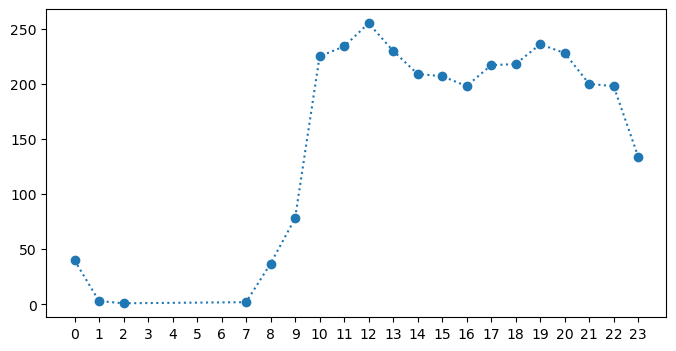

In [60]:
plt.figure(figsize=(8,4))
df['hour'].value_counts().sort_index().plot(marker='o', ls='dotted', xticks=np.arange(24))

## Group-By

One of the most powerful techniques is the Group-By mechanism of **pandas**
  * **Splitting** the data into groups based on some criteria
  * **Applying** a function to each group independently
  * **Combining** the results into a data structure
  
This works similar to the GROUP BY statement of SQL databases.

It is also possible to do SQL like JOINS.

In [64]:
df.groupby('source')

In [65]:
df.groupby('source')['id'].count().sort_values()

source
Twitter for iPad           9
Twitter for Android       44
Twitter Media Studio     396
Twitter Web App          914
Twitter for iPhone      1787
Name: id, dtype: int64

In [66]:
favorit_devices = _.index[-3:]

In [68]:
favorit_devices

Index(['Twitter Media Studio', 'Twitter Web App', 'Twitter for iPhone'], dtype='object', name='source')

### A more advanced group by example
  * Selecting a subset of interest
  * Groupby on multiple columns
  * Aggregating by counting the number of entries/tweets
  * Creating a pivot table
  * Viszualization

#### Select

In [67]:
subset = df[df.source.isin(favorit_devices)]
subset.source.unique()

array(['Twitter for iPhone', 'Twitter Media Studio', 'Twitter Web App'],
      dtype=object)

#### Groupby and Aggregate

In [69]:
count = subset.groupby(['source', 'hour'])['id'].count()
count.head()

source                hour
Twitter Media Studio  0        4
                      7        2
                      8       20
                      9        8
                      10      24
Name: id, dtype: int64

In [74]:
count

source                hour
Twitter Media Studio  0         4
                      7         2
                      8        20
                      9         8
                      10       24
                      11       20
                      12       39
                      13       23
                      14       26
                      15       26
                      16       16
                      17       28
                      18       26
                      19       34
                      20       24
                      21       31
                      22       22
                      23       23
Twitter Web App       0        16
                      9         5
                      10       39
                      11       87
                      12       87
                      13       73
                      14       54
                      15       78
                      16       94
                      17       64
                     

#### Pivot

In [70]:
pivot = count.reset_index().pivot('hour', 'source', values='id')
pivot.head()

/var/folders/t_/hsqj8fyx157635c7gfcr1ff80000gn/T/ipykernel_96544/855315418.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot = count.reset_index().pivot('hour', 'source', values='id')


source,Twitter Media Studio,Twitter Web App,Twitter for iPhone
hour,,,
0,4.0,16.0,20.0
1,NaN,NaN,3.0
2,NaN,NaN,1.0
7,2.0,NaN,NaN
8,20.0,NaN,13.0


#### Visualization

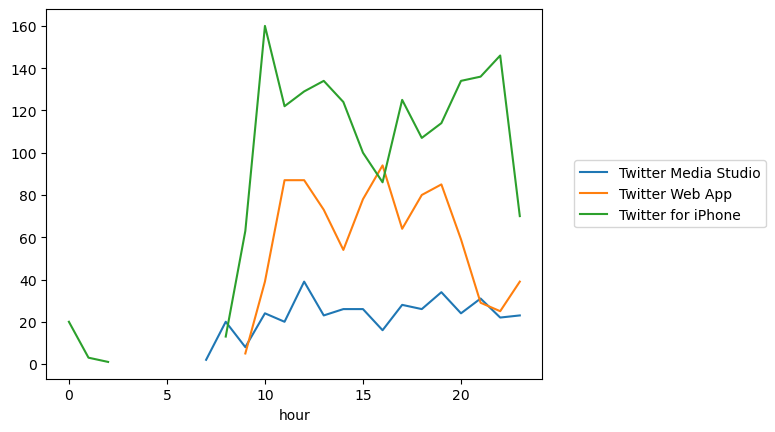

In [71]:
pivot.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

## Text Mining

We do some text mining and look for Matteo's favorit words

In [76]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.7 MB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.9/288.9 kB 17.4 MB/s eta 0:00:00


In [80]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('italian'))

['ad', 'al', 'allo', 'ai', 'agli', 'all', 'agl', 'alla', 'alle', 'con', 'col', 'coi', 'da', 'dal', 'dallo', 'dai', 'dagli', 'dall', 'dagl', 'dalla', 'dalle', 'di', 'del', 'dello', 'dei', 'degli', 'dell', 'degl', 'della', 'delle', 'in', 'nel', 'nello', 'nei', 'negli', 'nell', 'negl', 'nella', 'nelle', 'su', 'sul', 'sullo', 'sui', 'sugli', 'sull', 'sugl', 'sulla', 'sulle', 'per', 'tra', 'contro', 'io', 'tu', 'lui', 'lei', 'noi', 'voi', 'loro', 'mio', 'mia', 'miei', 'mie', 'tuo', 'tua', 'tuoi', 'tue', 'suo', 'sua', 'suoi', 'sue', 'nostro', 'nostra', 'nostri', 'nostre', 'vostro', 'vostra', 'vostri', 'vostre', 'mi', 'ti', 'ci', 'vi', 'lo', 'la', 'li', 'le', 'gli', 'ne', 'il', 'un', 'uno', 'una', 'ma', 'ed', 'se', 'perché', 'anche', 'come', 'dov', 'dove', 'che', 'chi', 'cui', 'non', 'più', 'quale', 'quanto', 'quanti', 'quanta', 'quante', 'quello', 'quelli', 'quella', 'quelle', 'questo', 'questi', 'questa', 'queste', 'si', 'tutto', 'tutti', 'a', 'c', 'e', 'i', 'l', 'o', 'ho', 'hai', 'ha', 'ab

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adrianodif/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [81]:
ita_stop = stopwords.words('italian')

In [86]:
" ".join(subset["text"].values.tolist())

'Straordinaria operazione contro la ‘ndrangheta, con 2,5 miliardi di guadagni illeciti intercettati e più di 100 arresti.\nOnore a donne e uomini che combattono, ogni giorno e a tutti i livelli, la criminalità organizzata.\nTolleranza zero contro i clan.\n\nhttps://t.co/T39zxjZ1yz Ora in diretta da Brescia all’evento promosso dai giovani imprenditori di Confindustria. https://t.co/5e8rmZRy4C Trovo francamente surreali le proteste sugli aumenti di stipendio da parte di chi dovrebbe rappresentare i lavoratori. \nDetto questo, la settimana prossima conto di incontrare i sindacati al MIT per un confronto anche su opere pubbliche, cantieri e sicurezza nei luoghi di lavoro. https://t.co/MeAIFy1YV7 Ringrazio l\'assessore Granelli del PD che stamattina ha chiesto di rimpatriare chi delinque e che, per questo, è stato duramente criticato dai compagni di partito.\nÈ questione di buonsenso, la politica del "permesso premio" e dell\'accoglienza per tutti è sbagliata e fallimentare.… https://t.co/r

In [90]:
words = [v.lower() for v in " ".join(subset["text"].values.tolist()).split() if v.lower() not in ita_stop]

In [91]:
pd.DataFrame(words).value_counts().head(10)

lega                    405
(1/2)                   235
(2/2)                   233
lavoro                  177
#25settembrevotolega    170
grazie                  170
avanti                  169
diretta                 152
italiani                152
oggi                    152
dtype: int64

In [94]:
favorit_words = ['[L|l]ega', '[I|i]taliani', '[A|a]vanti']
subset[subset.text.str.contains('|'.join(favorit_words))].source.value_counts()

Twitter for iPhone      622
Twitter Web App         338
Twitter Media Studio    145
Name: source, dtype: int64

Text(0, 0.5, 'Probability of bad language in percent')

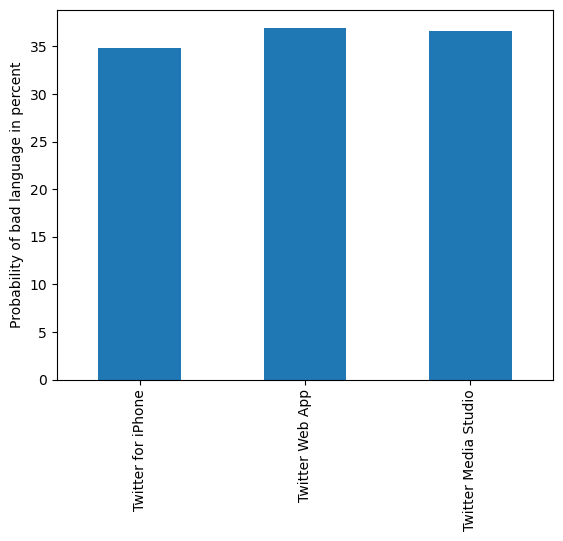

In [95]:
(_ / subset.source.value_counts() * 100).plot.bar()
plt.ylabel('Probability of bad language in percent')

### Average tweet length per device

<AxesSubplot: xlabel='hour'>

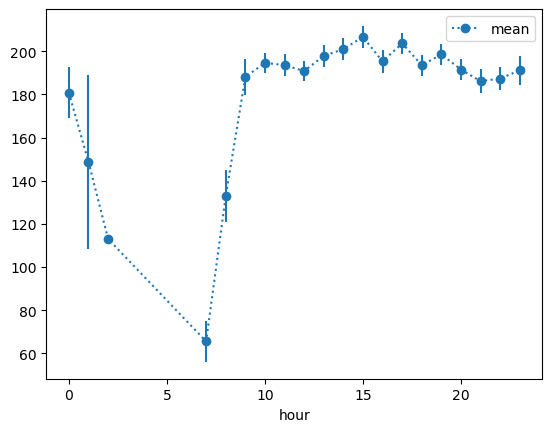

In [96]:
df['tweet_length'] = df.text.str.len()

subset = df[df.source.isin(favorit_devices)]

tweet_length = subset.groupby('hour')['tweet_length'].agg([np.mean, np.std, len])
tweet_length['mean_error'] = tweet_length['std'] / np.sqrt(tweet_length['len'])
tweet_length.plot(y='mean', yerr='mean_error', marker='o', ls='dotted')

## Exercise 

#### Task 1:

What is the maximum number of (original) tweets Matteo managed to perform in one hour?
What was the content of these messages?


#### Task 2:

Investigate the ratio between *retweets* and *original content* in relation to the used devices.
Which device does Matteo use to *retweet*, which one to write down *original content / ideas*.

